### Equações Diferenciais Numéricas

***Dado o PVI:***

\begin{equation}
\frac{\partial y}{\partial t} = \frac{2y}{\partial t} + t^2e^t
\end{equation}



Vetor de t's com h=0,2 [1.  1.2 1.4 1.6 1.8 2. ]

Vetor de y's [ 0.          0.54365637  1.68106883  3.7510126   7.22471835 12.75038287]



Vetor de t's com h = 0,1 [1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ]

Vetor de y's [ 0.          0.27182818  0.68475557  1.27697834  2.09354768  3.18744511
  4.62081783  6.46639636  8.80911967 11.74799652 15.39823563]



Vetor dos erros máximos para h=0.2 [4.90000179, 5.9848757, 7.30994369, 8.92838539, 10.90515454, 13.31958583]

Vetor dos erros máximos para h=0.1 [2.45000307, 2.99244051, 3.65497509, 4.46419666, 5.45258211, 6.65979883, 8.13429666, 9.93525238, 12.13494466, 14.82165487, 18.10321014]



Vetor de sol exata com h=0.2 [0.0, 0.86664254, 2.62035955, 5.72096153, 10.79362466, 18.68309708]

Vetor da diferença exata e inexata [0.0, 0.32298617, 0.93929072, 1.96994893, 3.56890631, 5.93271421]



Vetor de sol exata com h=0.1 [0.0, 0.34591988, 0.86664254, 1.60721508, 2.62035955, 3.96766629, 5.72096153, 7.96387348, 10.79362466, 14.32308154, 18.68

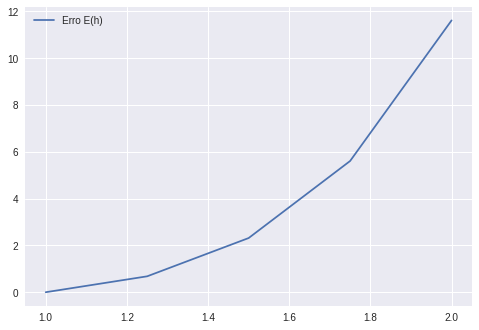

In [195]:
#Funçaõ para o exercício 2
#Forward Euler
import math, sys 
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

def ForwardEuler(f, t0, y0, T, n, dt):
    """Solve y'=f(t,y), y(0)=y0, with n steps until t=T."""
    if dt == -1:
        dt = (T-t0)/float(n)
    else:
        n = int(math.ceil((T-t0)/dt))
    t = np.zeros(n+1)
    y = np.zeros(n+1)  # y[k] is the solution at time t[k]
    y[0] = y0
    t[0] = t0
    for k in range(n):
        t[k+1] = t[k] + dt
        y[k+1] = round(y[k] + dt*f(t[k], y[k]), 8)
    return t, y

# Problem: y'=y
def f(t, y): 
    return (2*y/t + np.square(t)*math.exp(t)) #dado do exercício

def phi(t): 
    return np.square(t)*(math.exp(t) - math.exp(1))

t1, y1 = ForwardEuler(f, t0=1, y0=0, T=2, n=5, dt=0.2)
print ("\nVetor de t's com h=0,2", t1)
print ("\nVetor de y's", y1)
print ('\n')
t2, y2 = ForwardEuler(f, t0=1, y0=0, T=2, n=5, dt=0.1)
print ("\nVetor de t's com h = 0,1", t2)
print ("\nVetor de y's", y2)

# para a solução exata
exact1 = []
exact2 = []
difference1 = []
difference2 = []
maxError1 = []
maxError2 = []

# Aqui preenchemos as listas de diferenças entre sol exata e inexata para as
# duas aproximações, além disso preenche os vetores de sol exata e os de
# cota superior de erro para cada entrada.

# Queremos então comparar as cotas de erro com as diferenças.
pho = 5**(-9)
m = 98
for k in range(len(y1)):
    difference1.append(round((abs(phi(t1[k]) - y1[k])), 8))

for k in range(len(y2)):
    difference2.append(round((abs(phi(t2[k]) - y2[k])), 8))
    
for k in range(len(y1)):
    exact1.append(round(phi(t1[k]), 8))
    
for k in range(len(y2)):
    exact2.append(round(phi(t2[k]), 8))

### erro pro primeiro h 
for k in range(len(y1)):
    aux = 2*(t2[k] - 1)
    er = math.exp(aux)*(0.5*((0.2*m)/2 + pho/0.2) + pho)
    maxError1.append(round(er,8))

### erro pro segundo h
for k in range(len(y2)):
    maxError2.append(round((math.exp(2*(t2[k] - 1))*(0.5*((0.1*m)/2 + pho/0.1) + pho)), 8))
    
print ('\n')
print ('\nVetor dos erros máximos para h=0.2', maxError1)
print ('\nVetor dos erros máximos para h=0.1', maxError2)

print ('\n')
print ('\nVetor de sol exata com h=0.2', exact1)
print ('\nVetor da diferença exata e inexata', difference1)

print ('\n')
print ('\nVetor de sol exata com h=0.1', exact2)
print ('\nVetor da diferença exata e inexata', difference2)

resultHt, resultHy = ForwardEuler(f, t0=1, y0=0, T=2, n=10, dt=0.00001)

print ('\n')
print ('\nVetor de sol com h=0.00001', resultHy)

bla = round(np.interp(1.97, t2, y2), 8)

print ('\n')
print ('\nInterpolação:\n', bla)

hkVector = []

for k in range(1, 11):
    hkVector.append(0.025*k)
    
print ('\nVetor dos hk', hkVector)

vectorEh = [] #diferença entre um vetor de solução exata e não exata, h = 10
auxVectorT = [] 
auxVectorY = [] # não exatas
auxDifference = []

for k in range(10):
    auxVectorT, auxVectorY = ForwardEuler(f, t0=1, y0=0, T=2, n=10, dt=hkVector[k])
    for j in range(len(auxVectorY)):
        auxDifference.append(round((abs(phi(auxVectorT[j]) - auxVectorY[j])), 8))
    vectorEh.append(max(auxDifference))

print ('\nVetor de E(h)', vectorEh)    
    
# Todo: Derivar a função da letra f) na mão e igualar a zero para encontrar o
# nosso h* que minimiza e então resolver a questão.

forwEuler = ForwardEuler(f, t0=1, y0=0, T=2, n=10, dt=hkVector[k])
plt.plot(forwEuler[0], forwEuler[1])
#plt.plot(hkVector[0], vectorEh[1])
plt.legend(['Erro E(h)'])
plt.show()

Comentários sobre os resultados: 

**a)**

Pelo teorema de existência e unicidade, como phi é solução, é a única.

**b) **

Vetor de t's com h=0,2 [1.  1.2 1.4 1.6 1.8 2. ]
Vetor de y's [ 0.          0.54  1.68  3.75   7.22 12.75]

**c)** 

Vetor de t's com h = 0,1 [1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ]

Vetor de y's [ 0.          0.27  0.68 1.27  2.09  3.18
  4.62  6.46  8.80 11.74 15.39]
  
 A aproximação da solução com h = 0,1 foi mais precisa que com h = 0,2.

**d)**
  
 Interpolação:
 14.3031639
 
O valor exato é 18.68. O valor interpolado foi mais preciso que o de h = 0,2 e menos preciso que o de h = 0,1.
 
** e)**
 
 Vetor dos erros máximos para h = 0.2 [4.90, 5.98, 7.30, 8.92, 10.90, 13.31]

Vetor dos erros máximos para h = 0.1 [2.45, 2.99, 3.65, 4.46, 5.45, 6.65, 8.13, 9.93, 12.13, 14.82, 18.10]

Vetor de sol exata com h = 0.2 [0.0, 0.86, 2.62, 5.72, 10.79, 18.68]



Vetor da diferença exata e inexata [0.0, 0.32, 0.93, 1.96, 3.56, 5.93]

Vetor de sol exata com h = 0.1 [0.0, 0.34, 0.86, 1.60, 2.62, 3.96, 5.72, 7.96, 10.79, 14.32, 18.68]

Vetor da diferença exata e inexata [0.0, 0.07, 0.18, 0.33, 0.52, 0.78, 1.10, 1.49, 1.98, 2.57, 3.28]

**f)**

O h* que minimiza f(h) = hM/2 + ro/h é h* = 0,00001. Significa o melhor valor possível para minimizar o problema.

Vetor de sol com h=0.00001 [0.00 0.00271 0.00543 ... 18.68176]

Se tivéssemos usado este valor em b) e c) obteríamos a solução exata do problema.

**g)**
Gráfico na celula acima. 


## Exercício 4 

In [1]:
# Função para o Exercício 4 
'''
Foward Euler
RungeKutta4
Heun
Midpoint
Taylor
'''

import numpy as np
import matplotlib.pyplot as plt

def Euler(f, y0, T, n):
    """Solve y’= f(y,t), y(0)=y0, with n steps until t=T."""
    t = np.zeros(n+1)
    y = np.zeros(n+1) # y[k] is the solution at time t[k]
    y[0] = y0
    t[0] = 0
    dt = T/float(n)
    for k in range(n):
        t[k+1] = t[k] + dt
        y[k+1] = y[k] + dt*f(y[k], t[k])
    return y, t

# derivada de y
def dy(y,t):
    return (-2/(2*(y - 1))**2)

#derivada segunda de y
def dyy(y,t):
    return (8/(2*(y - 1))**3)

def Taylor(f, y0, T, n):
    """Solve y'=f(t,y), y(0)=y0, with n steps until t=T."""
    t = np.zeros(n+1)
    y = np.zeros(n+1)  # y[k] is the solution at time t[k]
    
    y[0] = y0
    t[0] = 0 #t0
    dt = T/float(n)
    """
    Taylor_series = []
    Taylor_series.append(1)
    Taylor_series.append(Taylor_series[-1] + dt)
    Taylor_series.append(Taylor_series[-1] + (1/2.0)*dt**2)
    Taylor_series.append(Taylor_series[-1] + (1/6.0)*dt**3)
    print ('h =', dt)
    for order in range(len(Taylor_series)):
        print ('order=', order, 'error=', math.exp(dt)-Taylor_series[order])
    """
    for k in range(n):
        t[k+1] = t[k] + dt  
        fk = f(y[k],t[k]) # f em t(k), y(k)
        dfk = dy(y[k],t[k]) # dy de f em t(k), y(k)
        ddfk = dyy(y[k],t[k]) # dyy de f em t(k), y(k)
        t1 = dt * fk
        t2 = ((dt**2)/2) * dfk * fk
        t3 = ((dt**3)/6) * ((ddfk * (fk**2)) + ((dfk**2) * fk))
        y[k+1] = y[k] + t1 + t2 + t3    
    return y, t

def Heun(f, y0, T, n):
    """Solve y'=f(t,y), y(0)=y0, with n steps until t=T."""
    t = np.zeros(n+1)
    y = np.zeros(n+1)  # y[k] is the solution at time t[k]
    dt = T/float(n)
    y[0] = y0
    t[0] = 0
    for k in range(n):
        t[k+1] = t[k] + dt
        y[k+1] = y[k] + (dt/2)*(f(y[k],t[k]) + f(y[k],t[k+1] + dt*f(y[k],t[k])))
    return y, t

def Midpoint(f, y0, T, n):
    """Solve y'=f(t,y), y(0)=y0, with n steps until t=T."""
    dt = T/float(n)
    t = np.zeros(n+1)
    y = np.zeros(n+1)  # y[k] is the solution at time t[k]
    y[0] = y0
    t[0] = 0
    for k in range(n):
        t[k+1] = t[k] + dt
        y[k+1] = y[k] + dt*f(y[k], t[k]+(dt/2) +(dt/2)*f(y[k],t[k]))
    return y, t

def RungeKutta4(f, y0, T, n):
    """Solve y'=f(t,y), y(0)=y0, with n steps until t=T."""
    t = np.zeros(n+1)
    y = np.zeros(n+1)
    y[0] = y0
    t[0] = 0
    dt = T/float(n)
    print('valor de h:',dt)
    for k in range(n):
        t[k+1] = t[k] + dt
        K1 = dt * f(y[k], t[k])
        K2 = dt * f(y[k] + 0.5*K1, t[k] + 0.5*dt)
        K3 = dt * f(y[k] + 0.5*K2, t[k] + 0.5*dt)
        K4 = dt * f(y[k] + K3, t[k] + dt)
        y[k+1] = y[k] + (1/6.0)*(K1 + 2*K2 + 2*K3 + K4)
    return y, t
    
def f(y, t):
    return 1.0/(2*(y-1))

def exact_sol(t):
    return 1 + np.sqrt(t + 0.001)
    
y0 = 1.0 + np.sqrt(0.001)

"""
Com n = 64 a solução de RungeKutta se aproxima mais da solução
exata, enquanto as outras permanecem em uma margem maior da exata.
"""

'\nCom n = 64 a solução de RungeKutta se aproxima mais da solução\nexata, enquanto as outras permanecem em uma margem maior da exata.\n'

valor de h: 1.0


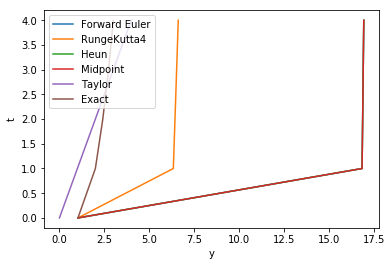

In [3]:
# running with t = 4 and n = 4 first
Euler4 = Euler(f, y0, 4, 4)
Kutta4 = RungeKutta4(f, y0, 4, 4)
Heun4 = Heun(f, y0, 4, 4)
Midpoint4 = Midpoint(f, y0, 4, 4)
Taylor4 = Taylor(f, y0, 4, 4)

plt.plot(Euler4[0], Euler4[1])
plt.plot(Kutta4[0], Kutta4[1])
plt.plot(Heun4[0], Heun4[1])
plt.plot(Midpoint4[0], Midpoint4[1])
plt.plot(Taylor4[1], Taylor4[1])
plt.plot(exact_sol(Kutta4[1]), Kutta4[1])

plt.legend(['Forward Euler','RungeKutta4','Heun','Midpoint','Taylor','Exact'], loc = 2)
plt.xlabel('y')
plt.ylabel('t')
plt.show()

valor de h: 0.5


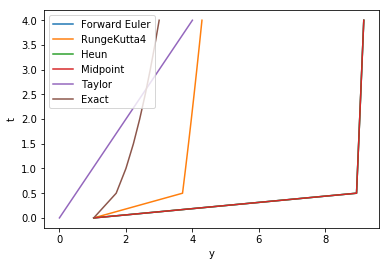

In [4]:
# running with t = 4 and n = 8
Euler8 = Euler(f, y0, 4, 8)
Kutta8 = RungeKutta4(f, y0, 4, 8)
Heun8 = Heun(f, y0, 4, 8)
Midpoint8 = Midpoint(f, y0, 4, 8)
Taylor8 = Taylor(f, y0, 4, 8)

plt.plot(Euler8[0], Euler8[1])
plt.plot(Kutta8[0], Kutta8[1])
plt.plot(Heun8[0], Heun8[1])
plt.plot(Midpoint8[0], Midpoint8[1])
plt.plot(Taylor8[1], Taylor8[1])
plt.plot(exact_sol(Kutta8[1]), Kutta8[1])

plt.legend(['Forward Euler','RungeKutta4','Heun','Midpoint','Taylor','Exact'], loc = 2)
plt.xlabel('y')
plt.ylabel('t')
plt.show()


valor de h: 0.25


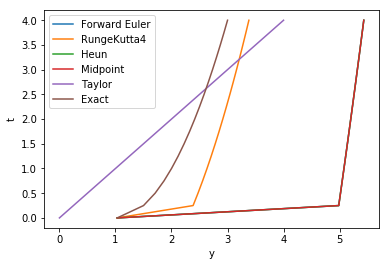

In [5]:
# running with t = 4 and n = 16
Euler16 = Euler(f, y0, 4, 16)
Kutta16 = RungeKutta4(f, y0, 4, 16)
Heun16 = Heun(f, y0, 4, 16)
Midpoint16 = Midpoint(f, y0, 4, 16)
Taylor16 = Taylor(f, y0, 4, 16)

plt.plot(Euler16[0], Euler16[1])
plt.plot(Kutta16[0], Kutta16[1])
plt.plot(Heun16[0], Heun16[1])
plt.plot(Midpoint16[0], Midpoint16[1])
plt.plot(Taylor16[1], Taylor16[1])
plt.plot(exact_sol(Kutta16[1]), Kutta16[1])

plt.legend(['Forward Euler','RungeKutta4','Heun','Midpoint','Taylor','Exact'], loc = 2)
plt.xlabel('y')
plt.ylabel('t')
plt.show()



valor de h: 0.125


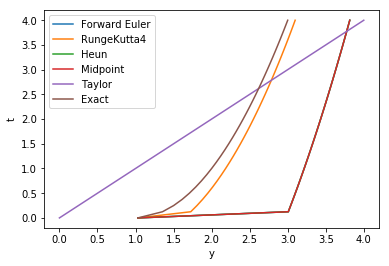

In [6]:
# running with t = 4 and n = 32
Euler32 = Euler(f, y0, 4, 32)
Kutta32 = RungeKutta4(f, y0, 4, 32)
Heun32 = Heun(f, y0, 4, 32)
Midpoint32 = Midpoint(f, y0, 4, 32)
Taylor32 = Taylor(f, y0, 4, 32)

plt.plot(Euler32[0], Euler32[1])
plt.plot(Kutta32[0], Kutta32[1])
plt.plot(Heun32[0], Heun32[1])
plt.plot(Midpoint32[0], Midpoint32[1])
plt.plot(Taylor32[1], Taylor32[1])
plt.plot(exact_sol(Kutta32[1]), Kutta32[1])

plt.legend(['Forward Euler','RungeKutta4','Heun','Midpoint','Taylor','Exact'], loc = 2)
plt.xlabel('y')
plt.ylabel('t')
plt.show()

valor de h: 0.0625


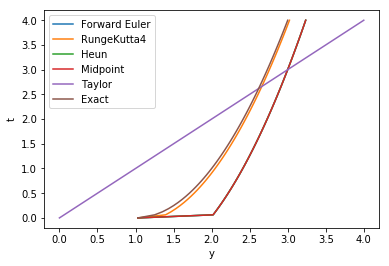

In [7]:
# running with t = 4 and n = 64
Euler64 = Euler(f, y0, 4, 64)
Kutta64 = RungeKutta4(f, y0, 4, 64)
Heun64 = Heun(f, y0, 4, 64)
Midpoint64 = Midpoint(f, y0, 4, 64)
Taylor64 = Taylor(f, y0, 4, 64)

plt.plot(Euler64[0], Euler64[1])
plt.plot(Kutta64[0], Kutta64[1])
plt.plot(Heun64[0], Heun64[1])
plt.plot(Midpoint64[0], Midpoint64[1])
plt.plot(Taylor64[1], Taylor64[1])
plt.plot(exact_sol(Kutta64[1]), Kutta64[1])

plt.legend(['Forward Euler','RungeKutta4','Heun','Midpoint','Taylor','Exact'], loc = 2)
plt.xlabel('y')
plt.ylabel('t')
plt.show()